<a href="https://colab.research.google.com/github/darpan02-cypher/Big-Data-Analytics/blob/main/Pycaret/example_pycaret_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pycaret

The primary purpose of this code is to load a pre-trained machine learning model and use it to make predictions on new, unseen data.

Here's a breakdown of the purpose in more detail:

Model Reusability: The code loads a pre-trained model from a file, demonstrating the ability to reuse existing models for new predictions without retraining. This saves time and resources.

Prediction on New Data: The core functionality lies in using the loaded model to predict on a new data point represented by test_data. This is the primary goal – to apply the model's learned patterns to generate predictions for unseen scenarios.

Accessing Predictions: The code then focuses on extracting and accessing the specific prediction value generated by the model. This is usually the desired outcome, allowing users to understand the model's prediction for the given input.

Practical Application: This code demonstrates a common scenario in real-world applications of machine learning: using a pre-trained model to make predictions on new data for tasks like:

Customer behavior prediction: Predicting customer churn, purchase likelihood, etc.
Financial forecasting: Predicting stock prices, risk assessment, etc.
Healthcare diagnostics: Predicting disease risk, treatment outcomes, etc.

In essence, this code snippet illustrates the core process of applying a trained machine learning model to generate predictions for real-world problems. It showcases model loading, prediction generation, and accessing the prediction outcome, all while leveraging the automation capabilities of PyCaret.

In [1]:
# prompt: want ti intsall pycaret

!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.4 MB/s eta 0:00:00
   ━━━━

In [16]:
# prompt: check if pycaret is installed successfully
import pycaret
print(pycaret.__version__)

3.3.2


In [17]:
from pycaret.regression import *
import pandas as pd

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# prompt: load dataset /content/sample_data/rf_model.pkl

loaded_model = load_model('/content/sample_data/rf_model')

Transformation Pipeline and Model Successfully Loaded


In [39]:
# Loading the saved model
rf_saved = load_model('/content/sample_data/rf_model')

Transformation Pipeline and Model Successfully Loaded


In [40]:
# generate predictions on unseen data
test_data = pd.DataFrame({'age': [35],
                          'sex': ['female'],
                          'bmi': [21.0],
                          'children' : [0],
                          'smoker': ['no'],
                          'region': ['southeast']})

predictions = predict_model(rf_saved, data = test_data)
predictions

,age,sex,bmi,children,smoker,region,prediction_label
0,35,female,21.0,0,no,southeast,7699.574878


In [45]:
predictions['prediction_label'][0]

7699.574877929687

In [46]:
# prompt: predict more data

# generate predictions on unseen data
test_data_more = pd.DataFrame({'age': [25, 45, 60],
                          'sex': ['male', 'female', 'male'],
                          'bmi': [25.5, 30.1, 22.8],
                          'children' : [1, 2, 0],
                          'smoker': ['no', 'yes', 'no'],
                          'region': ['southwest', 'northwest', 'southeast']})

predictions_more = predict_model(rf_saved, data = test_data_more)
predictions_more


,age,sex,bmi,children,smoker,region,prediction_label
0,25,male,25.500000,1,no,southwest,4161.374285
1,45,female,30.100000,2,yes,northwest,43756.814512
2,60,male,22.799999,0,no,southeast,13885.342441


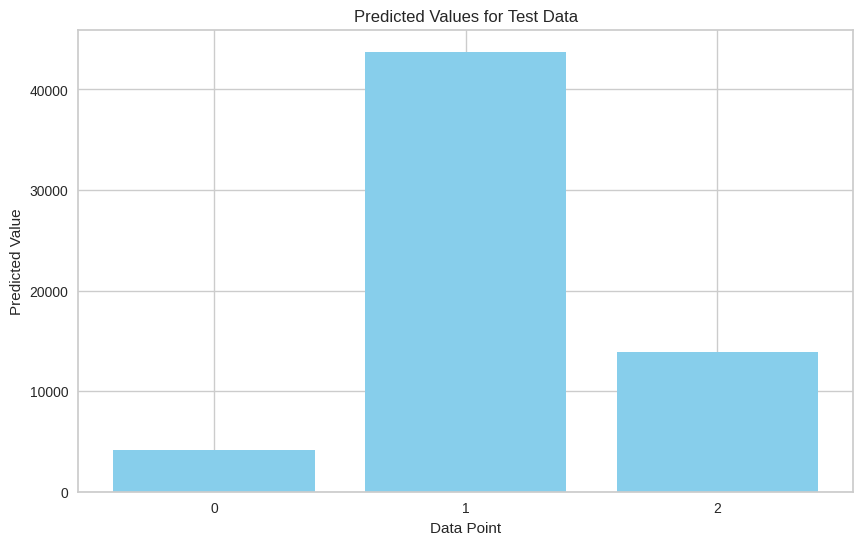

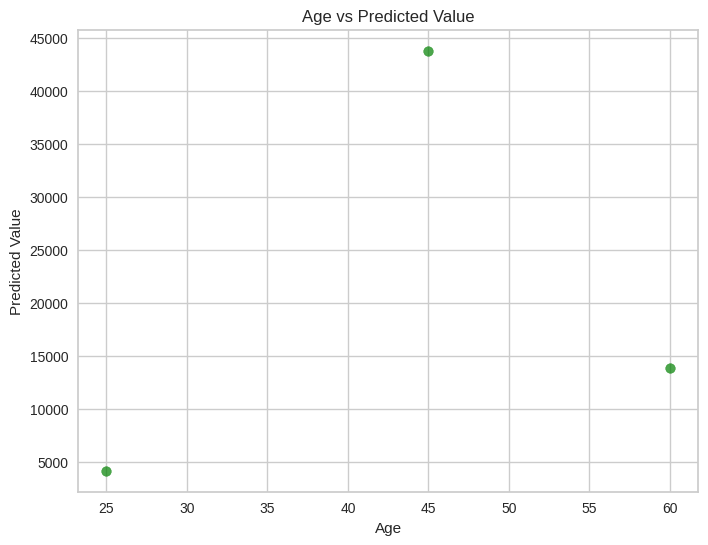

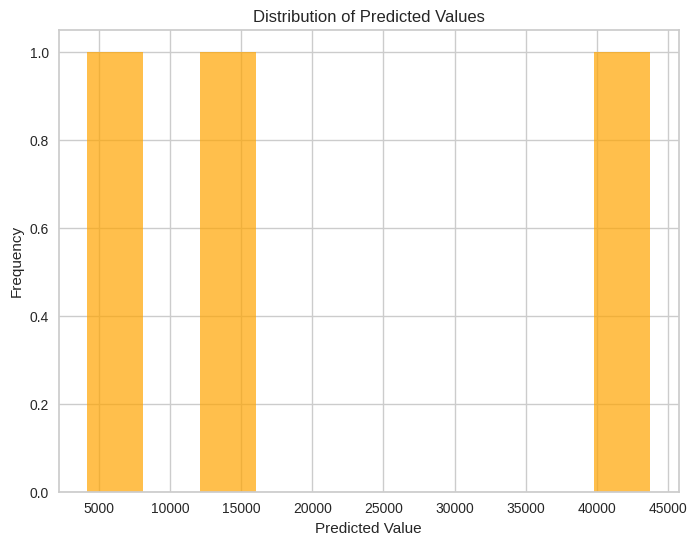

In [48]:
# prompt: visualize a chart to understand insights easy

import matplotlib.pyplot as plt

# Assuming 'predictions_more' DataFrame is available from the previous code

# Create a bar chart for predictions
plt.figure(figsize=(10, 6))
plt.bar(range(len(predictions_more)), predictions_more['prediction_label'], color='skyblue')
plt.xlabel("Data Point")
plt.ylabel("Predicted Value")
plt.title("Predicted Values for Test Data")
plt.xticks(range(len(predictions_more)), predictions_more.index) # Use index for x-axis labels
plt.show()

# Create a scatter plot of age vs prediction
plt.figure(figsize=(8,6))
plt.scatter(predictions_more['age'], predictions_more['prediction_label'], color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Predicted Value')
plt.title('Age vs Predicted Value')
plt.grid(True)
plt.show()


# Create a histogram of predictions
plt.figure(figsize=(8,6))
plt.hist(predictions_more['prediction_label'], bins=10, color='orange', alpha=0.7)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


In [ ]:
summary of the insights -

* A pre-trained random forest (RF) model is loaded for prediction, showcasing model reusability.
* Predictions are generated for both single and multiple data points.
*  A bar chart visualizes the predicted values for multiple data points.
* A scatter plot shows the relationship between age and predicted values.
* A histogram displays the distribution of predicted values.
